# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

### I chose to first start by understanding the problem in small chunks as you can see below.

This zip folder has 4 files in it which are: 
['a-0.png', 'a-1.png', 'a-2.png', 'a-3.png'].
Che Michig
True
<class 'PIL.PngImagePlugin.PngImageFile'>
Faces:  [[1966, 1881, 217, 217], [3139, 1733, 280, 280], [2545, 1957, 198, 198], [1150, 2000, 213, 213], [1674, 2025, 197, 197], [2661, 3065, 276, 276]]


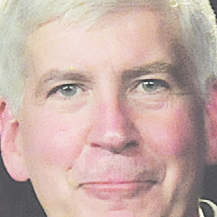

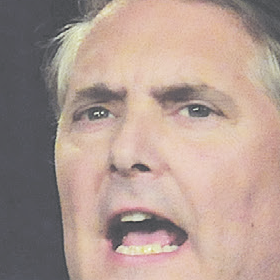

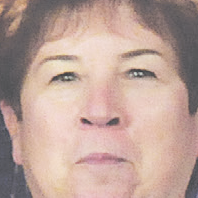

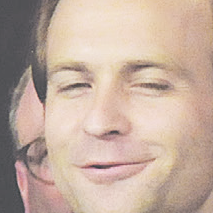

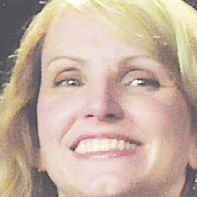

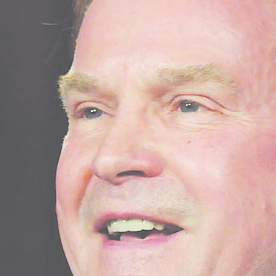

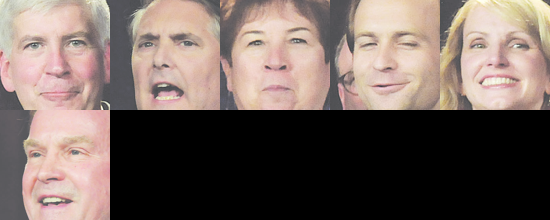

In [11]:
import zipfile
from zipfile import ZipFile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!
#___________________________________________________________________________________________

#files = ZipFile('readonly/images.zip', 'r') this works for the big files
files = ZipFile('readonly/small_img.zip', 'r') #these are the small images
#print(type(files))


# This will open each file in the zip folder and append it to the imagesInfoList and imagesFileNameList
imagesList = []
imagesFileNameList = []


for info in ZipFile.infolist(files):
    #print(info) #prints full info on the file
    #print(info.filename) #prints file name of each image
    #Image.open(info.filename)
    imagesList.append(Image.open(files.open(info.filename)))
    imagesFileNameList.append(info.filename)

print("This zip folder has {} files in it which are: \n{}.".format(len(imagesList), imagesFileNameList))



# This will display each file name and image in the images list
#for pic in imageslist:
#    print(info.filename)
#    display(pic)
#for pic in imagesList:
#    display(pic)





#test whether "Christopher" is in the image
text = pytesseract.image_to_string(Image.open(imagesFileNameList[0]))
if "Mark" in text:
    print(text[0:10])
    print("True")

#opens the image and displays it
image = Image.open(imagesFileNameList[0])
print(type(image))



#faces creates an array of x,y,w,h coordinates for each face
faces = (face_cascade.detectMultiScale(np.array(image), 1.3, 5)).tolist()
print("Faces: " , faces)




#create list of face images
faces_in_image = []

#take the faces detected, crop them out of the image and then display them
for x,y,w,h in faces:
    display(image.crop((x,y,x+w,y+h)))
    #face = image.crop((x,y,x+w,y+h))
    #contact_sheet.paste(image.crop((x,y,x+w,y+h)))
    #contact_sheet.paste(face.thumbnail((110,110)))
    #display(face.thumbnail((110,110)))
    faces_in_image.append(image.crop((x,y,x+w,y+h)))

    
#create contact sheet
first_image = faces_in_image[0]
contact_sheet= Image.new(image.mode, (550, int(np.ceil(len(faces_in_image)/5)) * 110))
x=0
y=0

for face in faces_in_image:
    face.thumbnail((110, 110))
    contact_sheet.paste(face, (x, y))
    if x + 110 == contact_sheet.width:
        x = 0
        y = y + first_image.height
    else:
        x = x + first_image.width

#display contact sheet
display(contact_sheet)
    
#display full image name was detected in
#display(image)





I was successful in creating the chunks of the code to get the desired output.  Namely these chunks were

- Extracting the files from the zip folder and putting the information into lists for later use.
- Using one of the images to identify and extract the text.
- Testing whether "Mark" was in the text.
- Identifying and cropping out the faces in the image.
- Putting the faces into a contact sheet.

After I understood these chunks of the problem, I was able to implement a more elegant code to handle all the files which can be seen below. 







While working on this project, I found that testing code was very time consuming because it took a long time to run code which was used to identify and extract text, and identify and extract the faces in the image.  As such, I broke up the code and ran each portion of this to save time testing code written later so the text and faces were in the memory and didn't have to be run each time.  This saved a lot of time later on, after I thought of it.


As you can see in the below input box, I ran the portion of code which took the longest to run which extracts the files in the zip folder, creates dictionaries of the zip information, pulling the text out of the image, and creates a function for the creation of the contact sheet.  This way, as i was testing the code 

In [12]:
#%%timeit  Do not use the timeit magic function.  You will lose your mind!
import time
start_time = time.time()
import zipfile
from zipfile import ZipFile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!
#___________________________________________________________________________________________

#files = ZipFile('readonly/images.zip', 'r') #this works for the big file
files = ZipFile('readonly/small_img.zip', 'r') #this works for the small file
#print(type(files))


# This will open each file in the zip folder and append it to the imagesInfoList and imagesFileNameList
imagesList = []
imagesFileNameList = []
imageDict = {}

print("Creating information dictionaries... please be patient.")
for file in ZipFile.infolist(files):
    #print(info) #prints full info on the file
    #print(info.filename) #prints file name of each image
    #Image.open(info.filename)
    imagesList.append(Image.open(files.open(file.filename)))
    imagesFileNameList.append(file.filename)
    img = Image.open(files.open(file))
    imageDict[file.filename] = {'pil_img' : img}

print("Pulling text out of images.  This will take a while")
for filename in imageDict.keys():
    text = pytesseract.image_to_string(imageDict[filename]['pil_img'])
    imageDict[filename]['text'] = text
    
print("Dictionaries created!")

print("This zip folder has {} files in it which are: \n{}.".format(len(imagesList), imagesFileNameList))

time_lapsed = (time.time() - start_time) / 60
print(time_lapsed)




Creating information dictionaries... please be patient.
Pulling text out of images.  This will take a while
Dictionaries created!
This zip folder has 4 files in it which are: 
['a-0.png', 'a-1.png', 'a-2.png', 'a-3.png'].
8.613727243741353


In [13]:
%%timeit
def create_contact_sheet(filename):
    #faces creates an array of x,y,w,h coordinates for each face
    print("Attempting to detect faces in {}... one moment.".format(filename))
    picture = Image.open(filename)
    faces = (face_cascade.detectMultiScale(np.array(picture), 1.3, 5)).tolist()
    #print("Faces: " , faces)

    #create list of face images
    faces_in_image = []

    #take the faces detected, crop them out of the image and then display them
    for x,y,w,h in faces:
        #display(picture.crop((x,y,x+w,y+h))) #used for testing to see the cropped faces
        faces_in_image.append(picture.crop((x,y,x+w,y+h)))

    
    #create contact sheet
    first_image = faces_in_image[0]
    contact_sheet= Image.new(picture.mode, (550, int(np.ceil(len(faces_in_image)/5)) * 110))
    x=0
    y=0

    for face in faces_in_image:
        face.thumbnail((110, 110))
        contact_sheet.paste(face, (x, y))
        if x + 110 == contact_sheet.width:
            x = 0
            y = y + first_image.height
        else:
            x = x + first_image.width
    if len(faces_in_image) > 0:
        print("These are the faces that were detected in {}:".format(filename))
    return contact_sheet


109 ns ± 2.08 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [33]:
def name_in_image_search(search_name):
    for filename in imageDict:
        if search_name in imageDict[filename]['text']:
            print("Results matching search criterion '{}' found in the file: {}".format(search_name, filename))
            try:
                display(create_contact_sheet(filename))
            except:
                print("There were no faces in that file!")
    

Results matching search criterion 'Christopher' found in the file: a-0.png
Attempting to detect faces in a-0.png... one moment.
These are the faces that were detected in a-0.png:


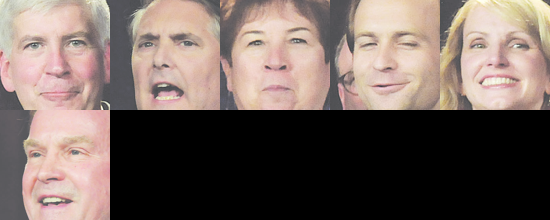

Results matching search criterion 'Christopher' found in the file: a-3.png
Attempting to detect faces in a-3.png... one moment.
These are the faces that were detected in a-3.png:


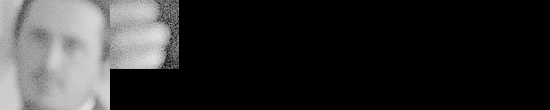

This took 0.9511425455411275 minutes to process.


In [34]:
#import time
start_time = time.time()
name_in_image_search("Christopher")
time_lapsed = (time.time() - start_time) / 60
print("This took {} minutes to process.".format(time_lapsed))

Results matching search criterion 'Mark' found in the file: a-0.png
Attempting to detect faces in a-0.png... one moment.
These are the faces that were detected in a-0.png:


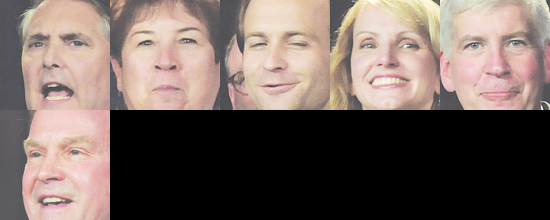

Results matching search criterion 'Mark' found in the file: a-1.png
Attempting to detect faces in a-1.png... one moment.
These are the faces that were detected in a-1.png:


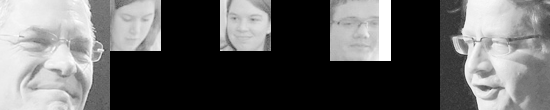

Results matching search criterion 'Mark' found in the file: a-2.png
Attempting to detect faces in a-2.png... one moment.
These are the faces that were detected in a-2.png:


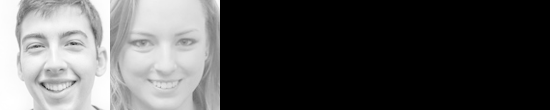

Results matching search criterion 'Mark' found in the file: a-3.png
Attempting to detect faces in a-3.png... one moment.
These are the faces that were detected in a-3.png:


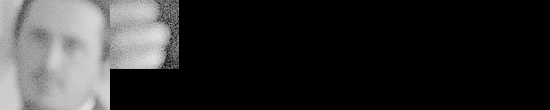

This took 1.6983083327611288 minutes to process.


In [35]:
start_time = time.time()
name_in_image_search("Mark")
time_lapsed = (time.time() - start_time) / 60
print("This took {} minutes to process.".format(time_lapsed))

Results matching search criterion 'pizza' found in the file: a-2.png
Attempting to detect faces in a-2.png... one moment.
These are the faces that were detected in a-2.png:


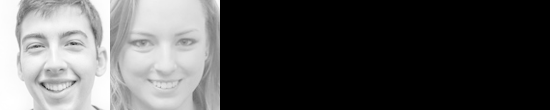

This took 0.4051885724067688 minutes to process.


In [36]:
start_time = time.time()
name_in_image_search("pizza")
time_lapsed = (time.time() - start_time) / 60
print("This took {} minutes to process.".format(time_lapsed))



## Ok, looks like we're in good shape using the small file.  Let's get going on the big file!
### These are the final project results

In [38]:
import time
start_time = time.time()

import zipfile
from zipfile import ZipFile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!
#___________________________________________________________________________________________

files = ZipFile('readonly/images.zip', 'r') #this works for the big file



# This will open each file in the zip folder and append it to the imagesInfoList and imagesFileNameList
imagesList = []
imagesFileNameList = []
imageDict = {}

print("Creating information dictionaries... please be patient.")
for file in ZipFile.infolist(files):
    #print(info) #prints full info on the file
    #print(info.filename) #prints file name of each image
    #Image.open(info.filename)
    imagesList.append(Image.open(files.open(file.filename)))
    imagesFileNameList.append(file.filename)
    img = Image.open(files.open(file))
    imageDict[file.filename] = {'pil_img' : img}

print("Pulling text out of images.  This will take a while")
for filename in imageDict.keys():
    text = pytesseract.image_to_string(imageDict[filename]['pil_img'])
    imageDict[filename]['text'] = text
    
print("Dictionaries created!")

print("This zip folder has {} files in it which are: \n{}.".format(len(imagesList), imagesFileNameList))

time_lapsed = (time.time() - start_time) / 60
print(time_lapsed)



Creating information dictionaries... please be patient.
Pulling text out of images.  This will take a while
Dictionaries created!
This zip folder has 14 files in it which are: 
['a-0.png', 'a-1.png', 'a-10.png', 'a-11.png', 'a-12.png', 'a-13.png', 'a-2.png', 'a-3.png', 'a-4.png', 'a-5.png', 'a-6.png', 'a-7.png', 'a-8.png', 'a-9.png'].
18.417934862772622


In [39]:
%%timeit
def create_contact_sheet(filename):
    #faces creates an array of x,y,w,h coordinates for each face
    print("Attempting to detect faces in {}... one moment.".format(filename))
    picture = Image.open(filename)
    faces = (face_cascade.detectMultiScale(np.array(picture), 1.3, 5)).tolist()
    #print("Faces: " , faces)

    #create list of face images
    faces_in_image = []

    #take the faces detected, crop them out of the image and then display them
    for x,y,w,h in faces:
        #display(picture.crop((x,y,x+w,y+h))) #used for testing to see the cropped faces
        faces_in_image.append(picture.crop((x,y,x+w,y+h)))

    
    #create contact sheet
    first_image = faces_in_image[0]
    contact_sheet= Image.new(picture.mode, (550, int(np.ceil(len(faces_in_image)/5)) * 110))
    x=0
    y=0

    for face in faces_in_image:
        face.thumbnail((110, 110))
        contact_sheet.paste(face, (x, y))
        if x + 110 == contact_sheet.width:
            x = 0
            y = y + first_image.height
        else:
            x = x + first_image.width
    if len(faces_in_image) > 0:
        print("These are the faces that were detected in {}:".format(filename))
    return contact_sheet


109 ns ± 3.32 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [43]:
def name_in_image_search(search_name):
    for filename in imageDict:
        if search_name in imageDict[filename]['text']:
            print("Results matching search criterion '{}' found in the file: {}".format(search_name, filename))
            try:
                display(create_contact_sheet(filename))
            except:
                print("There were no faces in that file!")

### Ok, looks like we have everything set to do searches.  Let's start with the search for "Christopher".

Results matching search criterion 'Christopher' found in the file: a-0.png
Attempting to detect faces in a-0.png... one moment.
These are the faces that were detected in a-0.png:


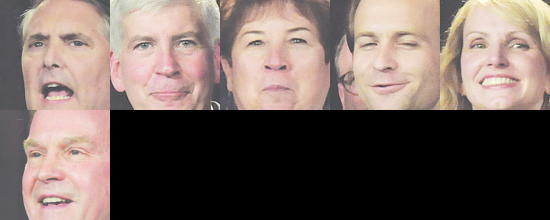

Results matching search criterion 'Christopher' found in the file: a-3.png
Attempting to detect faces in a-3.png... one moment.
These are the faces that were detected in a-3.png:


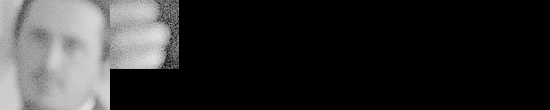

This took 0.9475626190503438 minutes to process.


In [44]:
#import time
start_time = time.time()
name_in_image_search("Christopher")
time_lapsed = (time.time() - start_time) / 60
print("This took {} minutes to process.".format(time_lapsed))

Looks successful and took just under a minute to run.

### Now let's search for "Mark"

Results matching search criterion 'Mark' found in the file: a-0.png
Attempting to detect faces in a-0.png... one moment.
These are the faces that were detected in a-0.png:


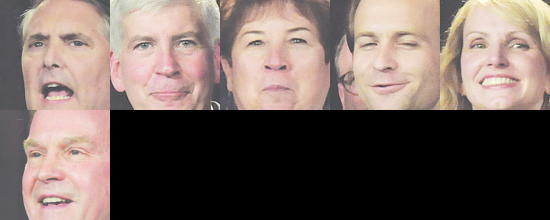

Results matching search criterion 'Mark' found in the file: a-1.png
Attempting to detect faces in a-1.png... one moment.
These are the faces that were detected in a-1.png:


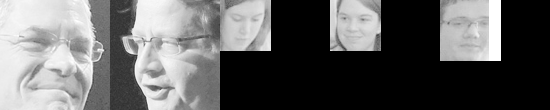

Results matching search criterion 'Mark' found in the file: a-10.png
Attempting to detect faces in a-10.png... one moment.
There were no faces in that file!
Results matching search criterion 'Mark' found in the file: a-13.png
Attempting to detect faces in a-13.png... one moment.
These are the faces that were detected in a-13.png:


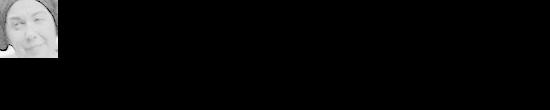

Results matching search criterion 'Mark' found in the file: a-2.png
Attempting to detect faces in a-2.png... one moment.
These are the faces that were detected in a-2.png:


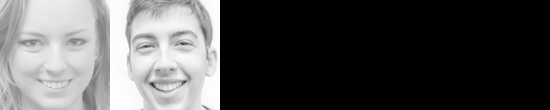

Results matching search criterion 'Mark' found in the file: a-3.png
Attempting to detect faces in a-3.png... one moment.
These are the faces that were detected in a-3.png:


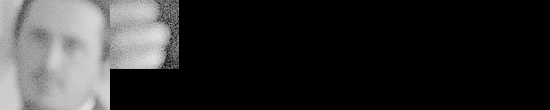

Results matching search criterion 'Mark' found in the file: a-8.png
Attempting to detect faces in a-8.png... one moment.
There were no faces in that file!
This took 2.3650304834047953 minutes to process.


In [45]:
start_time = time.time()
name_in_image_search("Mark")
time_lapsed = (time.time() - start_time) / 60
print("This took {} minutes to process.".format(time_lapsed))

That was also successful and took about 2.4 minutes to run.

### Let's do our final search for "pizza".

Results matching search criterion 'pizza' found in the file: a-2.png
Attempting to detect faces in a-2.png... one moment.
These are the faces that were detected in a-2.png:


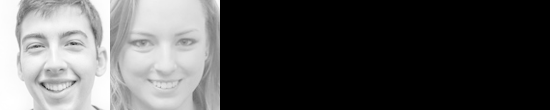

This took 0.40013173818588255 minutes to process.


In [46]:
start_time = time.time()
name_in_image_search("pizza")
time_lapsed = (time.time() - start_time) / 60
print("This took {} minutes to process.".format(time_lapsed))

## I'm doing a happy dance right now.  What a challenging project!